In [6]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
f = open(os.devnull, 'w')
sys.stdout = f

In [7]:
def sum_throughput(trace, name, style):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0:   
            s = trace
        else:
            s += trace
    ax.plot(range(0, 481, 5), s['rate'], style, linewidth=3.0, label=name)

In [8]:
mantle = glob.glob("mantle*.csv")
single = glob.glob("single*.csv")
isolated = glob.glob("isolate*.csv")
recovery = glob.glob("mds-zlog-seq-recovery/single*.csv")

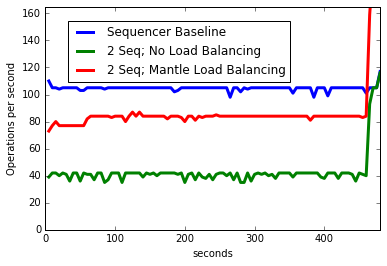

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

sum_throughput(isolated, "Sequencer Baseline", 'b-')
sum_throughput(single, "2 Seq; No Load Balancing", 'g-')
sum_throughput(mantle, "2 Seq; Mantle Load Balancing", 'r-')

ax.set_xlim(0, 480)
ax.set_ylim(0, 165)
ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
lgd = ax.legend(loc='center', bbox_to_anchor=(0.4, 0.8))

plt.savefig('mantle-seq-thruput.png', dpi=300, bbox_inches='tight')

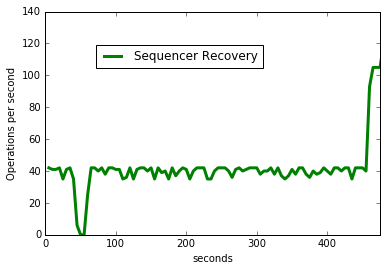

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

sum_throughput(recovery, "Sequencer Recovery", 'g-')

ax.set_xlim(0, 475)
ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
lgd = ax.legend(loc='center', bbox_to_anchor=(0.4, 0.8))

plt.savefig('recovery-seq-thruput.png', dpi=300, bbox_inches='tight')


In [94]:
mds0 = "cpu-issdm-15.out"
mds1 = "cpu-issdm-12.out"
mds2 = "cpu-issdm-10.out"

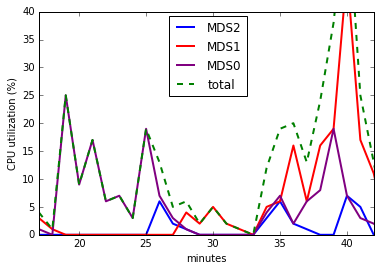

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)

mds1_trace = pd.read_table(mds1, header=None, sep=(","),names=("seconds", "cpu"), skiprows=13)
ax.plot(mds1_trace['cpu']*100, color='blue', linewidth=2.0, label="MDS2")

mds0_trace = pd.read_table(mds2, header=None, sep=(","),names=("seconds", "cpu"), skiprows=13)
ax.plot(mds0_trace['cpu']*100, color='red', linewidth=2.0, label="MDS1")

mds2_trace = pd.read_table(mds0, header=None, sep=(","),names=("seconds", "cpu"), skiprows=13)
ax.plot(mds2_trace['cpu']*100, color='purple', linewidth=2.0, label="MDS0")

ax.plot(mds0_trace['cpu']*100 + mds1_trace['cpu']*100 + mds2_trace['cpu']*100, 'g--', linewidth=2.0, label="total")

ax.set_xlim(17,42)
ax.set_ylim(0,40)
ax.set_xlabel("minutes")
ax.set_ylabel("CPU utilization (%)")
lgd = ax.legend(loc='center left', bbox_to_anchor=(0.37, 0.8))
plt.savefig('mantle-cpu-utilization.png', dpi=300, bbox_inches='tight')